In [3]:
import numpy as np
import matplotlib.pyplot as plt
from blackscholes import solve_bse

In [33]:
Szero = 1
sigma = 0.35
r = 0.03
mu = 0.02
T = 5
E = 2
Dt = 1e-2
N = int(T / Dt)
t = np.linspace(0, T, N)
C, Cdelta, P, Pdelta = solve_bse(Szero, E, r, sigma, T - t[0])

In [34]:
S = np.zeros(N)
asset = np.zeros(N)
cash = np.zeros(N)
portfolio = np.zeros(N)
values = np.zeros(N)

S[0] = Szero
values[0] = C
cash[0] = 1
portfolio[0] = asset[0] * S[0] + cash[0]

for i in range(N-1):
    S[i + 1] = S[i] * np.exp((mu - 0.5 * sigma**2.0)
                             * Dt + sigma * np.sqrt(Dt) * np.random.randn())
    portfolio[i + 1] = asset[i] * S[i + 1] + cash[i] * (1 + r * Dt)
    C, Cdelta, P, Pdelta = solve_bse(S[i + 1], E, r, sigma, T - t[i + 1])
    asset[i + 1] = Cdelta
    cash[i + 1] = cash[i] * (1 + r * Dt) - S[i + 1] * (asset[i + 1] - asset[i])
    values[i + 1] = C

vplot = values - (values[0] - portfolio[0]) * np.exp(r * t)

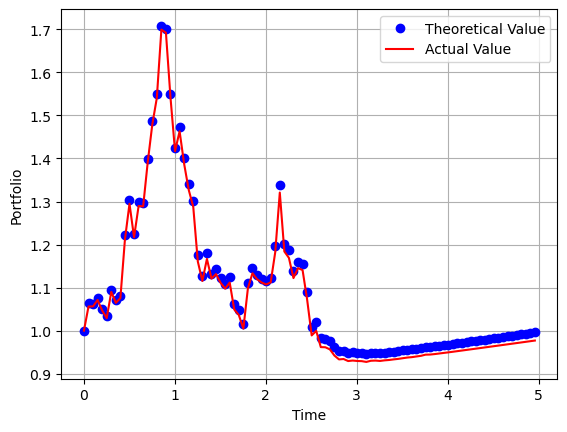

In [35]:
plt.figure()
plt.plot(t[::5], vplot[::5], 'bo', label="Theoretical Value")
plt.plot(t[::5], portfolio[::5], 'r-', label="Actual Value")
plt.xlabel('Time')
plt.ylabel('Portfolio')
plt.legend()
plt.grid()